<a href="https://colab.research.google.com/github/DavidD95/Clase_EDA_2024/blob/main/Proyecto_ClaseEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pregunta SMART**

1. Descripción del Problema para la Organización:

Actualmente en el servicio de Radioterapia falta de un sistema de optimización de la ocupación de los equipos biomédicos lo cual
provoca problemas como oportunidad lejana en la atención,
subutilización en ciertos momentos del día, y potenciales pérdidas de ingresos debido a la ineficiencia operativa.

2. Justificación:

La ciencia de datos puede analizar los datos históricos de ocupación para identificar patrones, picos de demanda
y factores que influyen en la variabilidad de la ocupación.
La IA puede ser utilizada para optimizar la asignación de citas y tiempos de uso de los equipos, minimizando tiempos muertos y maximizando la utilización del equipo.

3. Pregunta SMART:

¿Cual es la ocupación de los equipos en Radioterapia por franja horaria en el primer semestre del 2024?

# **Anáisis Exploratorio de Datos**



In [7]:
# Importar la librería pandas con el alias pd
import pandas as pd

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')


#en Google Colab"

#other_path = "/content/drive/MyDrive/Maestria CD ICESI/1 Semestre/Analisis Exploratorio de Datos/Prestaciones Radioterapia 2024 Ene-Jul.xlsx"
#df = pd.read_excel(other_path)

In [9]:
# Leer el conjunto de datos por medio de la URL proporcionada y asignarlo a la variable "df"

# Load the Excel file from the GitHub repository
url = "https://raw.githubusercontent.com/DavidD95/Clase_EDA_2024/main/PrestacionesRadioterapia.xlsx"
%pip install openpyxl
df = pd.read_excel(url)

Note: you may need to restart the kernel to use updated packages.


In [11]:
# Mostrar las primeras 5 filas del dataset utilizando el método dataframe.head()
print("Las primeras 5 filas del data frame:")
df.head(5)

Las primeras 5 filas del data frame:


,Mes,Episodio,Clase Episodio,Paciente,Primer Nombre,Segundo Nombre,Primer Apellido,Segundo Apellido,Edad,Grupo Edad,...,Prestación,Nombre Prestación,Fecha Prestación,Hora prestación,Unidad Gestora,Descripción unidad,Aseguradora,Nombre Aseguradora,Clase Aseguradora,Fecha Orden
0,Enero,11421980,Ambulatorio,1550655,JESUS,MARIA,MORENO,RAMIREZ,78,ADULTO,...,923105,RADIOCIRUGIA EXTRACRANEAL DE FUENTE UNICA DE F...,2024-01-04,10:44:00,TRADIOCX,Radiocirugia,1000002109,EPS SURAMERICANA S.A RC,ENTID PROM DE SALUD CONTRIBUT,2023-10-13 00:00:00
1,Enero,11576681,Ambulatorio,654806,CLARA,ELLIANA,MARTINEZ,BRAVO,50,ADULTO,...,922444,TELETERAPIA CON ACELERADOR LINEAL (PLANEACION ...,2024-01-19,14:15:00,TRADIOTE,Radioterapia,1000000198,NUEVA EPS S.A. ONCOLOGIA RC,ENTID PROM DE SALUD CONTRIBUT,2023-11-07 00:00:00
2,Enero,11465867,Ambulatorio,1728075,LUIS,EUDES,OSORIO,GIRALDO,77,ADULTO,...,923105,RADIOCIRUGIA EXTRACRANEAL DE FUENTE UNICA DE F...,2024-01-09,10:02:00,TRADIOCX,Radiocirugia,1000000198,NUEVA EPS S.A. ONCOLOGIA RC,ENTID PROM DE SALUD CONTRIBUT,2023-11-17 00:00:00
3,Enero,11392715,Ambulatorio,1663474,ISRAEL,NaN,HENAO,MORENO,58,ADULTO,...,SESIONRADT,SESION RADIOTERAPIA,2024-01-02,08:52:00,TRADIOTE,Radioterapia,1000002109,EPS SURAMERICANA S.A RC,ENTID PROM DE SALUD CONTRIBUT,2023-11-22 00:00:00
4,Enero,11411857,Ambulatorio,1679957,MARIA,JOSEFINA,ARCOS,NaN,69,ADULTO,...,SESIONRADT,SESION RADIOTERAPIA,2024-01-02,09:22:00,TRADIOTE,Radioterapia,1000002748,EPS SURAMERICANA S.A RS,ENTID PROM DE SALUD SUBSIDIADO,2023-11-28 00:00:00


In [12]:
print("Las últimas 5 filas del data frame\n")
df.tail(5)

Las últimas 5 filas del data frame



,Mes,Episodio,Clase Episodio,Paciente,Primer Nombre,Segundo Nombre,Primer Apellido,Segundo Apellido,Edad,Grupo Edad,...,Prestación,Nombre Prestación,Fecha Prestación,Hora prestación,Unidad Gestora,Descripción unidad,Aseguradora,Nombre Aseguradora,Clase Aseguradora,Fecha Orden
13226,Julio,12151310,Ambulatorio,1563588,ANABEIBA,NaN,GOMEZ,DE CARMONA,76,ADULTO,...,SESIONRADT,SESION RADIOTERAPIA,2024-07-25,09:04:00,TRADIOTE,Radioterapia,1000000198,NUEVA EPS S.A. ONCOLOGIA RC,ENTID PROM DE SALUD CONTRIBUT,18/07/2024
13227,Julio,12151310,Ambulatorio,1563588,ANABEIBA,NaN,GOMEZ,DE CARMONA,76,ADULTO,...,SESIONRADT,SESION RADIOTERAPIA,2024-07-29,09:15:00,TRADIOTE,Radioterapia,1000000198,NUEVA EPS S.A. ONCOLOGIA RC,ENTID PROM DE SALUD CONTRIBUT,18/07/2024
13228,Julio,12151310,Ambulatorio,1563588,ANABEIBA,NaN,GOMEZ,DE CARMONA,76,ADULTO,...,SESIONRADT,SESION RADIOTERAPIA,2024-07-17,13:30:00,TRADIOTE,Radioterapia,1000000198,NUEVA EPS S.A. ONCOLOGIA RC,ENTID PROM DE SALUD CONTRIBUT,NaN
13229,Julio,12151310,Ambulatorio,1563588,ANABEIBA,NaN,GOMEZ,DE CARMONA,76,ADULTO,...,SESIONRADT,SESION RADIOTERAPIA,2024-07-31,09:15:00,TRADIOTE,Radioterapia,1000000198,NUEVA EPS S.A. ONCOLOGIA RC,ENTID PROM DE SALUD CONTRIBUT,18/07/2024
13230,Julio,12151310,Ambulatorio,1563588,ANABEIBA,NaN,GOMEZ,DE CARMONA,76,ADULTO,...,SESIONRADT,SESION RADIOTERAPIA,2024-07-26,09:15:00,TRADIOTE,Radioterapia,1000000198,NUEVA EPS S.A. ONCOLOGIA RC,ENTID PROM DE SALUD CONTRIBUT,18/07/2024


In [14]:
print(df.columns)

Index(['Mes', 'Episodio', 'Clase Episodio', 'Paciente', 'Primer Nombre',
       'Segundo Nombre', 'Primer Apellido', 'Segundo Apellido', 'Edad',
       'Grupo Edad', 'Prestación Actual', 'Prestación', 'Nombre Prestación',
       'Fecha Prestación', 'Hora prestación', 'Unidad Gestora',
       'Descripción unidad', 'Aseguradora', 'Nombre Aseguradora',
       'Clase Aseguradora', 'Fecha Orden'],
      dtype='object')


In [15]:
# Ver la información de "df"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13231 entries, 0 to 13230
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Mes                 13231 non-null  object        
 1   Episodio            13231 non-null  int64         
 2   Clase Episodio      13231 non-null  object        
 3   Paciente            13231 non-null  int64         
 4   Primer Nombre       13231 non-null  object        
 5   Segundo Nombre      7947 non-null   object        
 6   Primer Apellido     13231 non-null  object        
 7   Segundo Apellido    11787 non-null  object        
 8   Edad                13231 non-null  int64         
 9   Grupo Edad          13231 non-null  object        
 10  Prestación Actual   13231 non-null  int64         
 11  Prestación          13231 non-null  object        
 12  Nombre Prestación   13231 non-null  object        
 13  Fecha Prestación    13231 non-null  datetime64

In [ ]:
#MATPLOTLIB
%pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#SEABORN
%pip install seaborn
import seaborn as sns

In [18]:
nombre_prestacion_frequencies = df['Nombre Prestación'].value_counts().reset_index()
nombre_prestacion_frequencies.columns = ['Nombre Prestación', 'Frecuencia']
nombre_prestacion_frequencies

,Nombre Prestación,Frecuencia
0,SESION RADIOTERAPIA,11112
1,SESION PARA BRAQUITERAPIA,672
2,TELETERAPIA CON ACELERADOR LINEAL (PLANEACION ...,435
3,BRAQUITERAPIA DE CONTACTO (PLANEACION COMPUTAR...,355
4,BRAQUITERAPIA INTRACAVITARIA (PLANEACION COMPU...,275
5,TELETERAPIA CON ACELERADOR LINEAL (PLANEACION ...,216
6,RADIOCIRUGIA EXTRACRANEAL DE FUENTE UNICA DE F...,77
7,RADIOCIRUGIA INTRACRANEAL DE MULTIPLE FUENTE D...,23
8,RADIOCIRUGIA INTRACRANEAL DE FUENTE UNICA DE F...,18
9,TBIC ADULTO (IRRADIACION CORPORAL TOTAL),16


In [27]:
filtered_df = df[df['Nombre Prestación'] == 'SESION RADIOTERAPIA']
filtered_df.head(5)

,Mes,Episodio,Clase Episodio,Paciente,Primer Nombre,Segundo Nombre,Primer Apellido,Segundo Apellido,Edad,Grupo Edad,...,Prestación,Nombre Prestación,Fecha Prestación,Hora prestación,Unidad Gestora,Descripción unidad,Aseguradora,Nombre Aseguradora,Clase Aseguradora,Fecha Orden
3,Enero,11392715,Ambulatorio,1663474,ISRAEL,NaN,HENAO,MORENO,58,ADULTO,...,SESIONRADT,SESION RADIOTERAPIA,2024-01-02,08:52:00,TRADIOTE,Radioterapia,1000002109,EPS SURAMERICANA S.A RC,ENTID PROM DE SALUD CONTRIBUT,2023-11-22 00:00:00
4,Enero,11411857,Ambulatorio,1679957,MARIA,JOSEFINA,ARCOS,NaN,69,ADULTO,...,SESIONRADT,SESION RADIOTERAPIA,2024-01-02,09:22:00,TRADIOTE,Radioterapia,1000002748,EPS SURAMERICANA S.A RS,ENTID PROM DE SALUD SUBSIDIADO,2023-11-28 00:00:00
6,Enero,11413466,Ambulatorio,342526,LEONARDO,FABIO,PAZ,PATIÑO,45,ADULTO,...,SESIONRADT,SESION RADIOTERAPIA,2024-01-02,16:17:00,TRADIOTE,Radioterapia,1000000282,COLMEDICA MEDICINA PREPAGADA,EMP MEDICINA PREPAGADA,2023-11-28 00:00:00
7,Enero,11413466,Ambulatorio,342526,LEONARDO,FABIO,PAZ,PATIÑO,45,ADULTO,...,SESIONRADT,SESION RADIOTERAPIA,2024-01-04,15:38:00,TRADIOTE,Radioterapia,1000000282,COLMEDICA MEDICINA PREPAGADA,EMP MEDICINA PREPAGADA,2023-11-28 00:00:00
10,Enero,11411857,Ambulatorio,1679957,MARIA,JOSEFINA,ARCOS,NaN,69,ADULTO,...,SESIONRADT,SESION RADIOTERAPIA,2024-01-04,09:15:00,TRADIOTE,Radioterapia,1000002748,EPS SURAMERICANA S.A RS,ENTID PROM DE SALUD SUBSIDIADO,2023-11-28 00:00:00


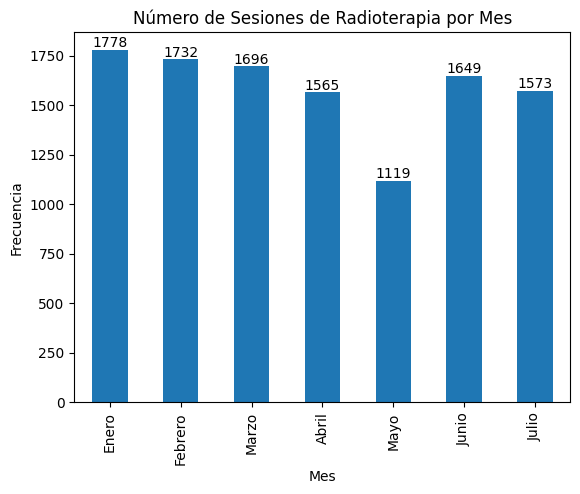

In [75]:
# Set the order of the months
month_order = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio']

nombre_prestacion_frequencies_by_month.plot(x='Mes', y='Frecuencia', kind='bar', xticks=range(len(month_order)))
plt.xticks(range(len(month_order)), month_order)
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.title('Número de Sesiones de Radioterapia por Mes')

# Set labels for the bars
for i, value in enumerate(nombre_prestacion_frequencies_by_month['Frecuencia']):
    plt.text(i, value, str(value), ha='center', va='bottom')
    
# Remove the legend
plt.legend().remove()
plt.show()


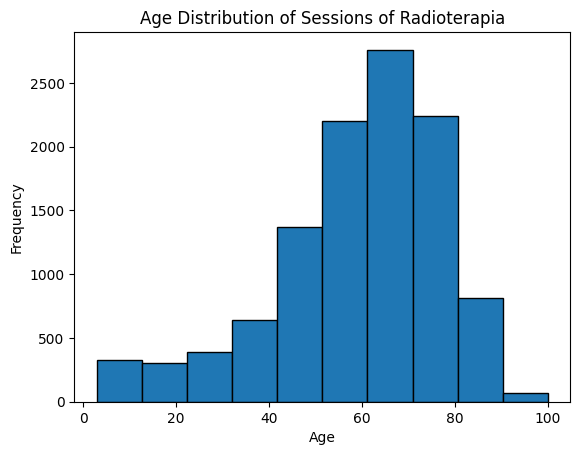

In [108]:

# Filter the dataframe to include only the sessions of radioterapia
filtered_df = df[df['Nombre Prestación'] == 'SESION RADIOTERAPIA']

# Create a histogram of the age distribution
plt.hist(filtered_df['Edad'], bins=10, edgecolor='black')

# Set the labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Sessions of Radioterapia')

# Show the histogram
plt.show()

C:\Users\david\AppData\Local\Temp\ipykernel_4568\4109856699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Hora prestación'] = pd.to_datetime(df['Hora prestación'].astype(str))
C:\Users\david\AppData\Local\Temp\ipykernel_4568\4109856699.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Hora prestación'] = filtered_df['Hora prestación'].dt.hour


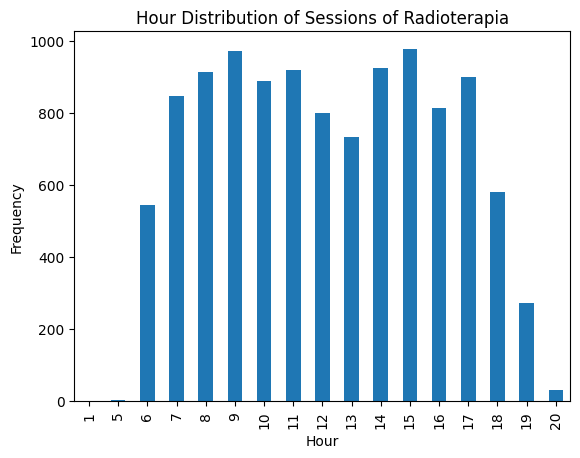

In [109]:
# Filter the dataframe to include only the sessions of radioterapia
filtered_df = df[df['Nombre Prestación'] == 'SESION RADIOTERAPIA']
filtered_df['Hora prestación'] = pd.to_datetime(df['Hora prestación'].astype(str))

# Extract the hour from the datetime column
filtered_df['Hora prestación'] = filtered_df['Hora prestación'].dt.hour

# Create a bar plot of the hour distribution
filtered_df['Hora prestación'].value_counts().sort_index().plot(kind='bar')

# Set the labels and title
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Hour Distribution of Sessions of Radioterapia')

# Show the plot
plt.show()